In [1]:
'''
Import the helper functions: map_tuple, mean
'''
%run ./lib/helper.py
%run ./lib/graph.py
%run ./lib/graph_edge_factory.py
%run ./lib/plot.py
%run ./lib/routing_simulation.py
%run ./lib/routing_algorithms.py
%run ./lib/logger.py

# Initial knowledge approach (after refactoring)

In [2]:
samples = 1000
threshold = 1
max_dth = 4
algorithms = [routing_algorithms.initial_knowledge_init]
algorithm_names = [algo.__name__ for algo in algorithms]

simulation_settings = routing_simulation.SimulationSettings(algorithms=algorithms, number_of_samples=samples)

factory = graph_edge_factory.VirtualEdgeFactory(distance_threshold=threshold, max_distance_threshold=max_dth)
graph_edges = factory.generate_deterministic_graph_edges()

topology_settings = routing_simulation.TopologySettings()

simulation = routing_simulation.Simulation(simulation_settings, topology_settings)

start = time.time()
simulation.run_algorithm_for_graphs()
end = time.time()
print(simulation.final_results)
for algo_name in algorithm_names:
    plot.plot_results([simulation.final_results[algo_name]], 'initial_knowledge_maxdth_'
                      + str(max_dth) + str(end - start), save_tikz=False)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



{'initial_knowledge_init': ([2.596, 5544388.092, 21027099.057, 24860173.33125, 32143624.8756, 34553740.376666665, 41124054.97128572, 64806302.621375, 66346149.163777776, 65588962.18260001, 71709962.37463637, 82607395.14458333, 80083962.443, 94800595.24885713, 91687063.41953334, 99210661.3715, 108156334.56058823, 100286499.37494446, 105028849.67221053, 105033514.70639999, 123423752.6827143, 112441745.63995454, 116158630.43617392, 115046436.00595833, 112908777.85803999, 126989280.93676923, 130992267.3267037, 129563922.2882143, 136211257.04255173, 137507256.65836668, 138044305.03225806, 137637452.87771875, 137543917.68357575, 139782169.97617644, 144427151.63205716, 148269256.53802776, 146539883.31656757, 147376870.8107895, 154860047.86689746, 157049768.20115003, 152354518.55285367, 157971688.30457142, 160114638.9862558, 157559337.74865907, 161453638.7303111, 157811228.86932608, 162404815.29240423, 165847561.32183334, 166510175.63293877, 162420337.04056], [61.404, 60.235, 59.02166666666667

NameError: name 'plot' is not defined

{'initial_knowledge_init': ([2.596, 5544388.092, 21027099.057, 24860173.33125, 32143624.8756, 34553740.376666665, 41124054.97128572, 64806302.621375, 66346149.163777776, 65588962.18260001, 71709962.37463637, 82607395.14458333, 80083962.443, 94800595.24885713, 91687063.41953334, 99210661.3715, 108156334.56058823, 100286499.37494446, 105028849.67221053, 105033514.70639999, 123423752.6827143, 112441745.63995454, 116158630.43617392, 115046436.00595833, 112908777.85803999, 126989280.93676923, 130992267.3267037, 129563922.2882143, 136211257.04255173, 137507256.65836668, 138044305.03225806, 137637452.87771875, 137543917.68357575, 139782169.97617644, 144427151.63205716, 148269256.53802776, 146539883.31656757, 147376870.8107895, 154860047.86689746, 157049768.20115003, 152354518.55285367, 157971688.30457142, 160114638.9862558, 157559337.74865907, 161453638.7303111, 157811228.86932608, 162404815.29240423, 165847561.32183334, 166510175.63293877, 162420337.04056], [61.404, 60.235, 59.02166666666667

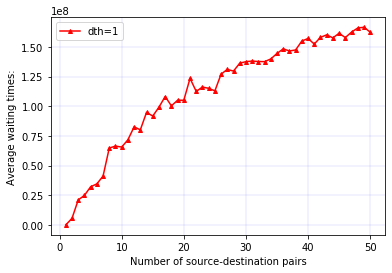

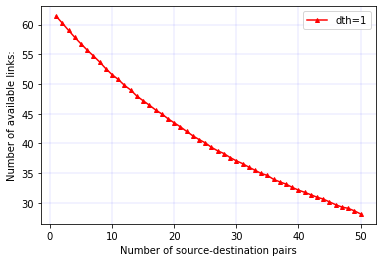

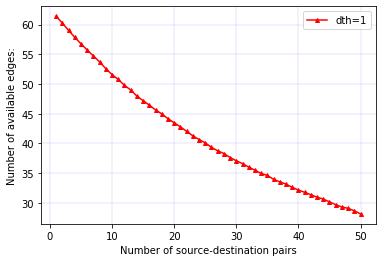

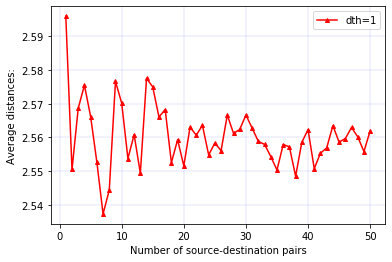

In [3]:
print(simulation.final_results)
for algo_name in algorithm_names:
    plot_results([simulation.final_results[algo_name]], 'initial_knowledge_maxdth_'
                      + str(max_dth) + str(end - start), save_tikz=False)

In [4]:
print(end-start)

3910.1840131282806


# Run initial knowledge link prediction dth=16, maxdth=16 x7

Traceback (most recent call last):
  File "/home/antal/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-fbcc4b45608c>", line 22, in <module>
    save_tikz = False)
  File "/home/antal/Documents/eit/thesis/implementation/quantum_routing/notebooks/lib/plot.py", line 113, in plot_results
    plot_type=plot_type, save_tikz=save_tikz)
  File "/home/antal/Documents/eit/thesis/implementation/quantum_routing/notebooks/lib/plot.py", line 51, in plot_specific_measure
    plt.plot(results[index][measure_index], color=colors[index], label=topology_names[index])
IndexError: list index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/antal/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'In

IndexError: list index out of range

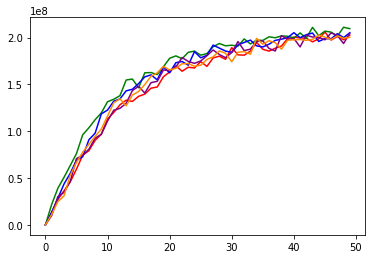

In [3]:
initial_knowledge_results = []
initial_knowledge_results_link_prediction = []
samples = 1000
start = time.time()
threshold = 4
for x in range(10):
    factory = graph_edge_factory.VirtualEdgeFactory(distance_threshold=threshold)
    graph_edges = factory.generate_random_power_law_graph_edges()
    arguments = {'algorithm': initial_knowledge_init, 'graph_edges': graph_edges,
                 'link_prediction': False, 'exponential_scale': True}
    topology_result, length = routing_simulation.run_algorithm_for_graphs(50, samples, arguments)
    initial_knowledge_results.append(topology_result)
    
    arguments = {'algorithm': initial_knowledge_init, 'graph_edges': graph_edges,
                 'link_prediction': True, 'exponential_scale': True}
    topology_result_link_prediction, length = routing_simulation.run_algorithm_for_graphs(50, samples, arguments)
    initial_knowledge_results_link_prediction.append(topology_result_link_prediction)
end = time.time()
# link_prediction_iterative_betweenness_centrality_
write_results_to_file(initial_knowledge_results, 'initial_knowledge_random_graph_dth_' + str(threshold), '' , (end - start))
plot_results(initial_knowledge_results, 'initial_knowledge_random_graph_dth_' + str(threshold) + str(end-start),
                  save_tikz = False)
write_results_to_file(initial_knowledge_results_link_prediction, 'initial_knowledge_link_prediction_random_graph_dth_' + str(threshold), '' , (end - start))
plot_results(initial_knowledge_results_link_prediction, 'initial_knowledge_link_prediction_random_graph_dth_' + str(threshold) + str(end-start),
                  save_tikz = False)

In [5]:
write_results_to_file(initial_knowledge_results_link_prediction, 'initial_knowledge_link_prediction_random_graph_dth_' + str(threshold), '' , (end - start))

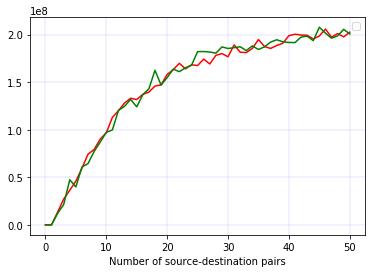

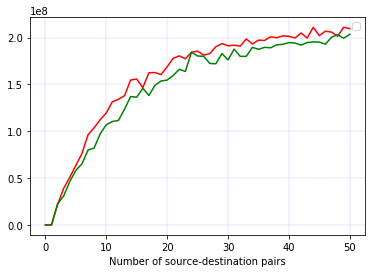

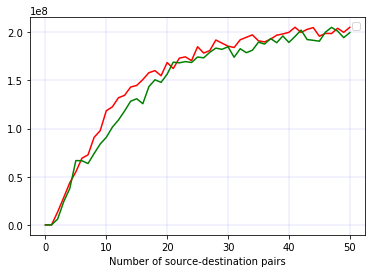

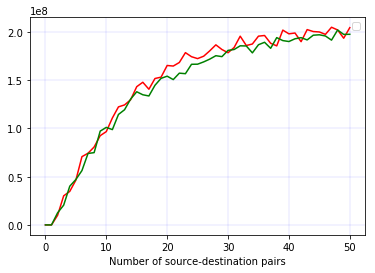

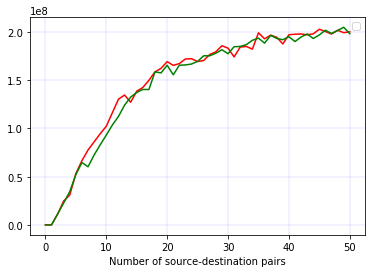

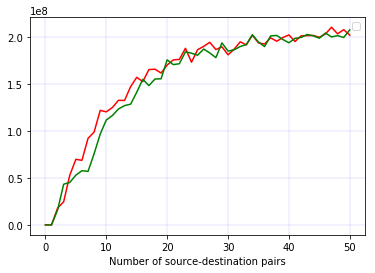

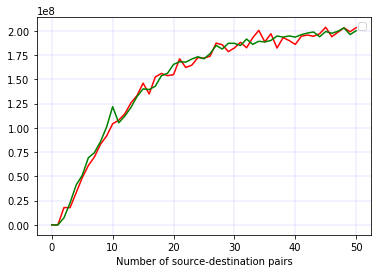

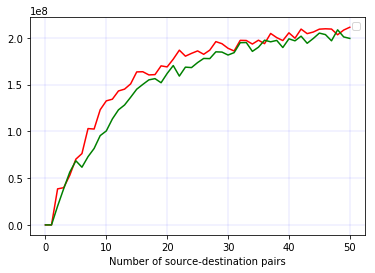

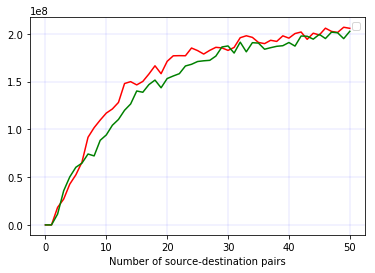

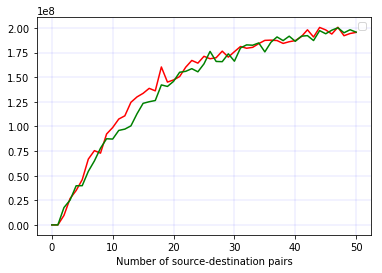

In [28]:
colors = ['red', 'green', 'blue', 'purple', 'darkorange', 'magenta']
for x in range(10):
    
    plt.grid(color='b', linestyle='-', linewidth=0.1)
    plt.xlabel('Number of source-destination pairs')
    
    plt.legend(loc=0)

    plt.plot([0] + initial_knowledge_results[x][0], color=colors[0], label='initial')
    plt.plot([0] + initial_knowledge_results_link_prediction[x][0], color=colors[1], label='initial_link_prediction')
    #plot_results([(([0] + initial_knowledge_results[x][0]),),(([0] + initial_knowledge_results_link_prediction[x][0]),)], 'initial_knowledge_det_link_prediction_betweenness_centrality_dth_' + str(threshold) + str(end-start),
    #              save_tikz = False)
    plt.show()

In [29]:
print(initial_knowledge_results[0][0])
print(initial_knowledge_results_link_prediction[0][0])

[4.012, 13362920.9565, 27104049.621666666, 36448513.06725, 46027197.61839999, 59545712.4695, 74338369.75628571, 79253472.398375, 90225497.078, 96781202.9806, 113001025.15645455, 119992260.60075, 128152939.58076923, 133104400.17507143, 131790518.88053334, 137217917.513125, 139584781.90070587, 145949585.7218889, 147182360.39089474, 158143536.83429998, 163202463.10057145, 169850411.89563635, 164019654.01208696, 168294498.39541665, 167490635.38603997, 174300613.32584617, 169165796.6278889, 178217716.3947857, 180064176.61358622, 176738890.74996668, 189208220.63390324, 181504237.93953124, 181134663.06390908, 185478849.58061767, 194824307.43594286, 187415629.92475, 185492367.86102703, 188557779.16863158, 190921846.08579487, 198887456.023, 200413666.1842683, 199570388.23071426, 199301641.5554651, 195394617.53259096, 198575899.9523333, 205845644.83204347, 197266082.98853192, 201113693.4897708, 197640678.63769388, 202581502.47777998]
[3.938, 12088419.1405, 21419006.70966667, 47441557.06, 3991796

In [33]:
results = [0, 3.273, 17578911.683, 41232367.537, 67825751.22375, 83175370.6698, 94346212.169, 96480930.62214285, 131582173.934125, 129225418.85177779, 132208419.433, 135512632.37818182, 154831515.76575, 165403151.3370769, 154835163.6115, 167134178.79693335, 179877064.283625, 177761082.0952353, 175157986.61016667, 177615541.4456316, 176261791.17485002, 188677189.11942855, 182484054.19040912, 190174804.48756522, 197208599.48591664, 194371078.66228002, 196955819.61246154, 202031472.66337037, 189433362.21667856, 193315113.46872413, 199691386.53559998, 196803418.57329035, 201320651.46546876, 202047292.11557573, 197911481.52091178, 199529670.90202856, 206824289.888, 206453723.94416216, 203042178.88610527, 202225495.63517946, 207195049.464475, 205808759.13712195, 209042776.39438096, 202865958.44274417, 203374941.12906817, 209231237.72911114, 202193890.3205, 217776715.1983617, 213494549.50960416, 211962964.1737551, 202534948.59859997]

In [34]:
plot_results([(results,)], 'initial_knowledge_det_link_prediction_betweenness_centrality_dth_' + str(threshold) + str(end-start),
                  save_tikz = True)

IndexError: tuple index out of range

<Figure size 432x288 with 0 Axes>

In [10]:
print(initial_knowledge_results[3][0][30])
print(initial_knowledge_results_link_prediction[3][0][30])

119426493.37132259
133300811.06941935


In [12]:
print(initial_knowledge_results)

[([2.586, 5869887.895, 10233361.387333332, 13613748.19075, 14955694.3426, 26229484.834333334, 29393993.452, 38729517.173125, 35878063.505555555, 41978235.0195, 49227726.906, 49398667.73291667, 62304350.30084615, 63390855.5485, 66524240.404133335, 72267967.561375, 76901395.5725294, 74088818.38761112, 86168958.6396316, 93875321.029, 94087294.49966666, 100317651.81363636, 99523177.88986957, 110975362.609875, 103624627.77216001, 113750671.82984616, 119745006.27103703, 121006051.65267858, 124313048.109, 127070103.10963331], [61.414, 60.0635, 58.834, 57.5315, 56.238, 55.01316666666667, 53.755428571428574, 52.438375, 51.294555555555554, 50.1353, 49.03, 47.80483333333333, 46.59461538461539, 45.4025, 44.526, 43.4126875, 42.131470588235295, 41.18566666666666, 40.269894736842105, 39.30735, 38.22452380952381, 37.22722727272727, 36.29934782608696, 35.17625, 34.46568, 33.560884615384616, 32.547666666666665, 31.70510714285714, 30.90841379310345, 29.98473333333333], [61.414, 60.0635, 58.834, 57.5315, 

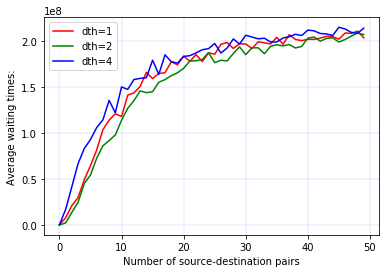

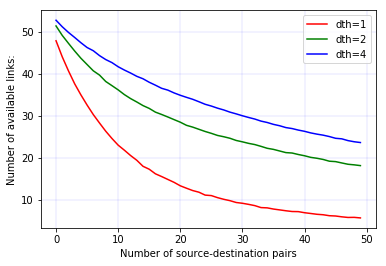

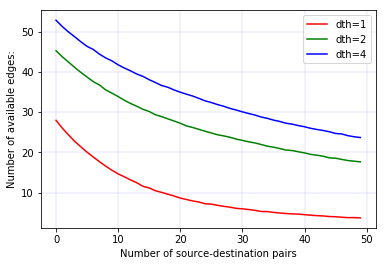

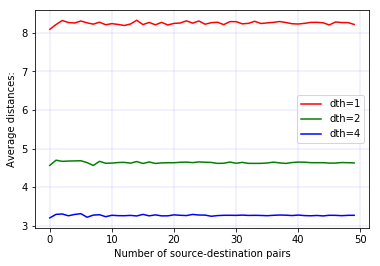

In [8]:
plot_results(initial_knowledge_results, 'poly', topology_names=['dth=1','dth=2','dth=4','dth=8','dth=16'], save_tikz=False)

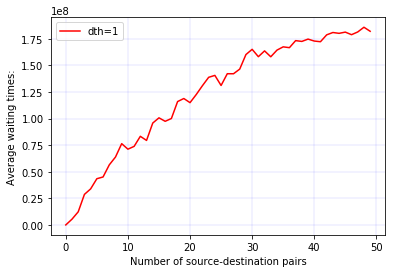

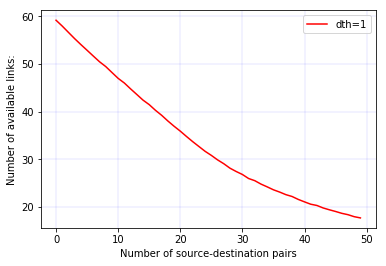

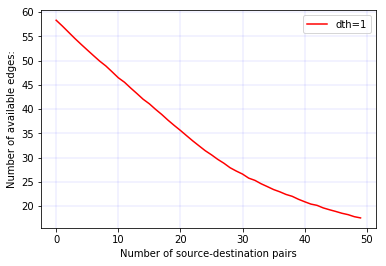

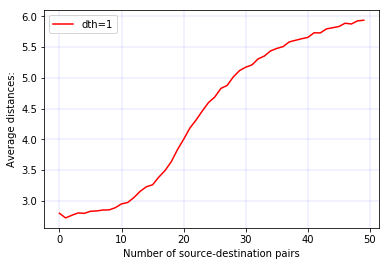

In [4]:
initial_knowledge_results = []
samples = 1000
max_dth = 16
start = time.time()
threshold = 16
factory = VirtualEdgeFactory(distance_threshold=threshold, max_distance_threshold=max_dth)
graph_edges = factory.generate_deterministic_graph_edges()
arguments = {'algorithm': initial_knowledge_init, 'graph_edges': graph_edges,
             'link_prediction': True, 'exponential_scale': True}
topology_result, length = routing_simulation.run_algorithm_for_graphs(50, samples, arguments)
initial_knowledge_results.append(topology_result)
end = time.time()
write_results_to_file(initial_knowledge_results, 'initial_knowledge_det_link_prediction_betweenness_centrality_dth_' + str(threshold), '' , (end - start))
plot_results(initial_knowledge_results, 'initial_knowledge_det_link_prediction_betweenness_centrality_dth_' + str(threshold) + str(end-start),
                  save_tikz = False)

In [7]:
new_initial = [0] + initial_knowledge_results[0][0]
print(new_initial)

[0, 2.669, 2644456.3895, 17440024.297333337, 19777610.3985, 25913880.837800004, 38731566.9555, 39729442.78814285, 45189564.71375, 51258043.65866667, 50518083.1436, 61172725.125454545, 71291987.60066667, 70716864.67792308, 71312696.52571428, 74588802.21586667, 81844055.153125, 88632304.51370586, 89959985.18983333, 93254450.64052631, 104283373.18014999, 110359475.12257142, 99114764.69131817, 118071349.27043478, 110000257.70720835, 108782275.49260001, 110016542.36430769, 111415899.8185926, 116425091.85235715, 119528320.77203448, 134890221.32273334, 124692304.68358062, 126773231.44234376, 129438855.33975758, 131506638.24814707, 138314198.98502856, 139019901.77794445, 135245609.34962162, 141600365.31463158, 142130369.2373077, 146075885.05967498, 145938255.43302438, 145917208.0995476, 147589615.98032555, 146317419.0615227, 151931228.89313337, 154643122.0918913, 151861727.39929786, 151726257.1098125, 154971367.67787758, 158621841.5199]


In [8]:
plot_results([(new_initial,)], 'initial_knowledge_det_link_prediction_betweenness_centrality_dth_' + str(threshold) + str(end-start),
                  save_tikz = True)

Traceback (most recent call last):
  File "/home/antal/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-ac868c7127eb>", line 2, in <module>
    save_tikz = True)
  File "/home/antal/Documents/eit/thesis/implementation/quantum_routing/notebooks/lib/plot.py", line 113, in plot_results
    plot_type=plot_type, save_tikz=save_tikz)
  File "/home/antal/Documents/eit/thesis/implementation/quantum_routing/notebooks/lib/plot.py", line 51, in plot_specific_measure
    plt.plot(results[index][measure_index], color=colors[index], label=topology_names[index])
IndexError: tuple index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/antal/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'Ind

IndexError: tuple index out of range

<Figure size 432x288 with 0 Axes>

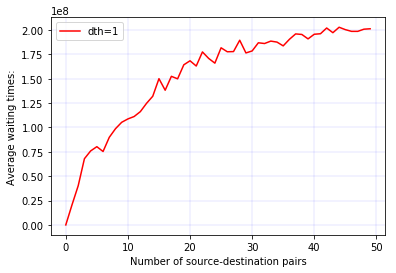

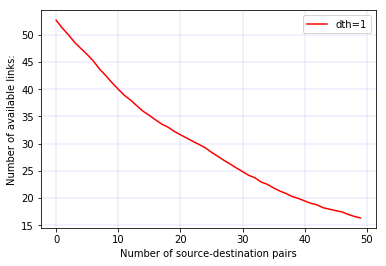

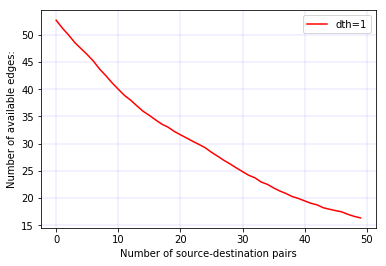

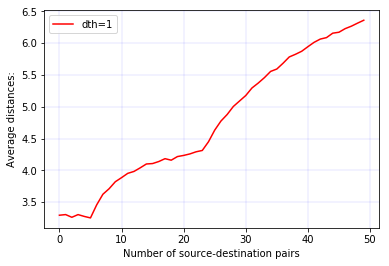

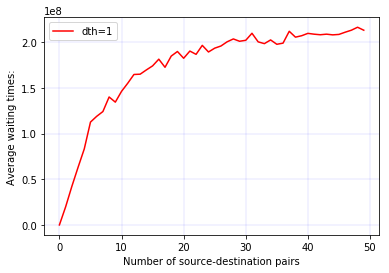

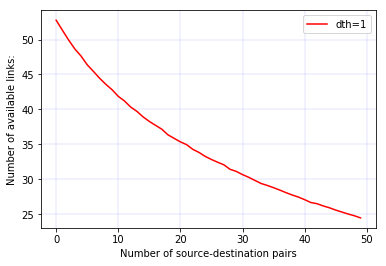

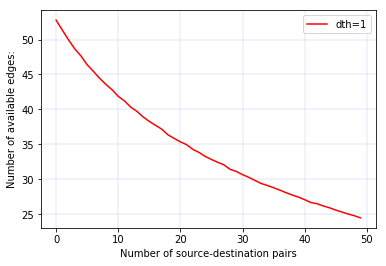

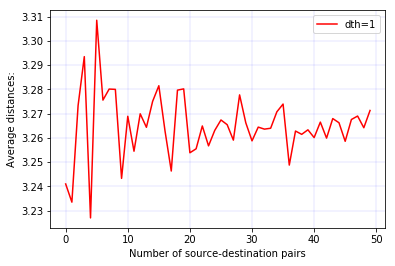

In [17]:
initial_knowledge_results = []
initial_knowledge_results_link_prediction = []
samples = 1000
max_dth = 4
start = time.time()
threshold = 4
factory = VirtualEdgeFactory(distance_threshold=threshold, max_distance_threshold=max_dth)
graph_edges = factory.generate_deterministic_graph_edges()
arguments = {'algorithm': initial_knowledge_init, 'graph_edges': graph_edges,
             'link_prediction': True, 'exponential_scale': True}
topology_result, length = routing_simulation.run_algorithm_for_graphs(50, samples, arguments)
initial_knowledge_results.append(topology_result)

arguments = {'algorithm': initial_knowledge_init, 'graph_edges': graph_edges,
             'link_prediction': False, 'exponential_scale': True}
topology_result, length = routing_simulation.run_algorithm_for_graphs(50, samples, arguments)
initial_knowledge_results_link_prediction.append(topology_result)
end = time.time()
write_results_to_file(initial_knowledge_results, 'initial_knowledge_det_betweenness_centrality_dth_' + str(threshold), '' , (end - start))
plot_results(initial_knowledge_results, 'initial_knowledge_det_betweenness_centrality_dth_' + str(threshold) + str(end-start),
                  save_tikz = False)
write_results_to_file(initial_knowledge_results_link_prediction, 'initial_knowledge_det_link_prediction_betweenness_centrality_dth_' + str(threshold), '' , (end - start))
plot_results(initial_knowledge_results_link_prediction, 'initial_knowledge_det_link_prediction_betweenness_centrality_dth_' + str(threshold) + str(end-start),
                  save_tikz = False)

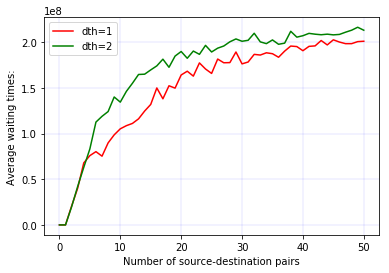

IndexError: tuple index out of range

In [21]:
plot_results([([0] + initial_knowledge_results[0][0],),([0] + initial_knowledge_results_link_prediction[0][0],)], 'initial_knowledge_det_link_prediction_betweenness_centrality_dth_' + str(threshold) + str(end-start),
                  save_tikz = False)

In [22]:
plot_results(initial_knowledge_results, 'initial_knowledge_det_betweenness_centrality_dth_' + str(threshold) + str(end-start),
                  save_tikz = True)
plot_results(initial_knowledge_results_link_prediction, 'initial_knowledge_det_link_prediction_betweenness_centrality_dth_' + str(threshold) + str(end-start),
                  save_tikz = True)

<Figure size 432x288 with 0 Axes>

In [23]:
print(initial_knowledge_results)

[([3.294, 20582031.7905, 40229760.612, 67914491.87025, 75892337.958, 80243710.5825, 75304736.59157142, 89836706.625125, 98671254.78377777, 105264446.628, 108705000.75890909, 111171769.78425, 116179685.15646154, 124710356.8577143, 131965061.10400002, 149995303.13, 138148475.18123528, 152412814.5333889, 149839327.4146316, 164224375.72480002, 168344031.1122381, 162981730.08627272, 177436175.72773913, 170780277.8245417, 165928115.17556, 181668482.70357692, 177607587.9304074, 177778708.76557142, 189410332.8494138, 176393187.70623332, 178437105.24783868, 186805187.1935, 186059300.02215153, 188527716.00391173, 187523236.0015143, 183640698.42819446, 190355889.3902973, 195906129.59107897, 195354437.828, 190809175.69525, 195563603.48539025, 196078598.57211903, 201967632.85690698, 197154174.92738634, 202748245.4679778, 200301338.21736956, 198528648.2000213, 198523071.0882708, 200760293.06816328, 201183327.87156], [52.706, 51.2565, 49.993333333333325, 48.5955, 47.486, 46.392, 45.18571428571429, 43